<a href="https://colab.research.google.com/github/paul821/nesarc/blob/main/nesarc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executive Summary

yuh. proceed with the acquisitions of monetary assets in the form of cash.






Problem statement

Investigate whether family history of alcohol and drug use affects an individual's tendency to undergo depression episodes, and if so, to what extent the impact is.

Data

Data is from the US National Epidemiologic Survey of Drug Use and Health, a survey designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population. It is a representative sample of the non-institutionalized population 18 years and older. 

Variables

Response:

* S4AQ1 - ever had 2-week period when felt sad, blue, depressed, or down most of time (categorical)
> used for determining if there is an impact

* S4AQ7 - number of depression episodes (numeric)
> used for prediction

Explanatory:

Alcohol

* S2DQ1 - blood/natural father ever an alcoholic or problem drinker (categorical)
* S2DQ2 - blood/natural mother ever an alcoholic or problem drinker (categorical)
* S2DQ3C1 - number of full brothers who were ever alcoholics or problem drinkers (numeric)
* S2DQ4C1 - number of full sisters who were ever alcoholics or problem drinkers (numeric)


Drugs

* S3EQ1 - blood/natural father ever had problems with drugs (categorical)
* S3EQ2 - blood/natural mother ever had problems with drugs (categorical)
* S3EQ3B - number of full brothers who ever had problems with drugs (numeric)
* S3EQ4B - number of full sisters who ever had problems with drugs (numeric)





Data cleaning

In [ ]:
#import packages

import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import scipy.stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
use_col = ['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B','S4AQ1','S4AQ7']
data = pandas.read_csv('nesarc.csv', low_memory=False, usecols = use_col)

In [ ]:
data = data.apply(pandas.to_numeric, errors='coerce')

In [ ]:
data['S2DQ1']=data['S2DQ1'].replace(9, numpy.nan)
data['S2DQ2']=data['S2DQ2'].replace(9, numpy.nan)
data['S2DQ3C1']=data['S2DQ3C1'].replace(99, numpy.nan)
data['S2DQ4C1']=data['S2DQ4C1'].replace(99, numpy.nan)

data['S3EQ1']=data['S3EQ1'].replace(9, numpy.nan)
data['S3EQ2']=data['S3EQ2'].replace(9, numpy.nan)
data['S3EQ3B']=data['S3EQ3B'].replace(99, numpy.nan)
data['S3EQ4B']=data['S3EQ4B'].replace(99, numpy.nan)

data['S4AQ1']=data['S4AQ1'].replace(9, numpy.nan)
data['S4AQ7']=data['S4AQ7'].replace(numpy.nan, 0).replace(99, numpy.nan)

In [ ]:
recode1 = {1: 1, 2: 0}
data['S2DQ1']= data['S2DQ1'].map(recode1) #centering exp
data['S2DQ2']= data['S2DQ2'].map(recode1)
data['S3EQ1']=data['S3EQ1'].map(recode1)
data['S3EQ2']=data['S3EQ2'].map(recode1)
data['S4AQ1']=data['S4AQ1'].map(recode1)


In [ ]:
data=data.dropna()
data.shape

(37467, 10)

1. Graph all variables to see if any of them are greatly biased towards one response

Text(0.5, 1.0, 'Number of depression episodes')

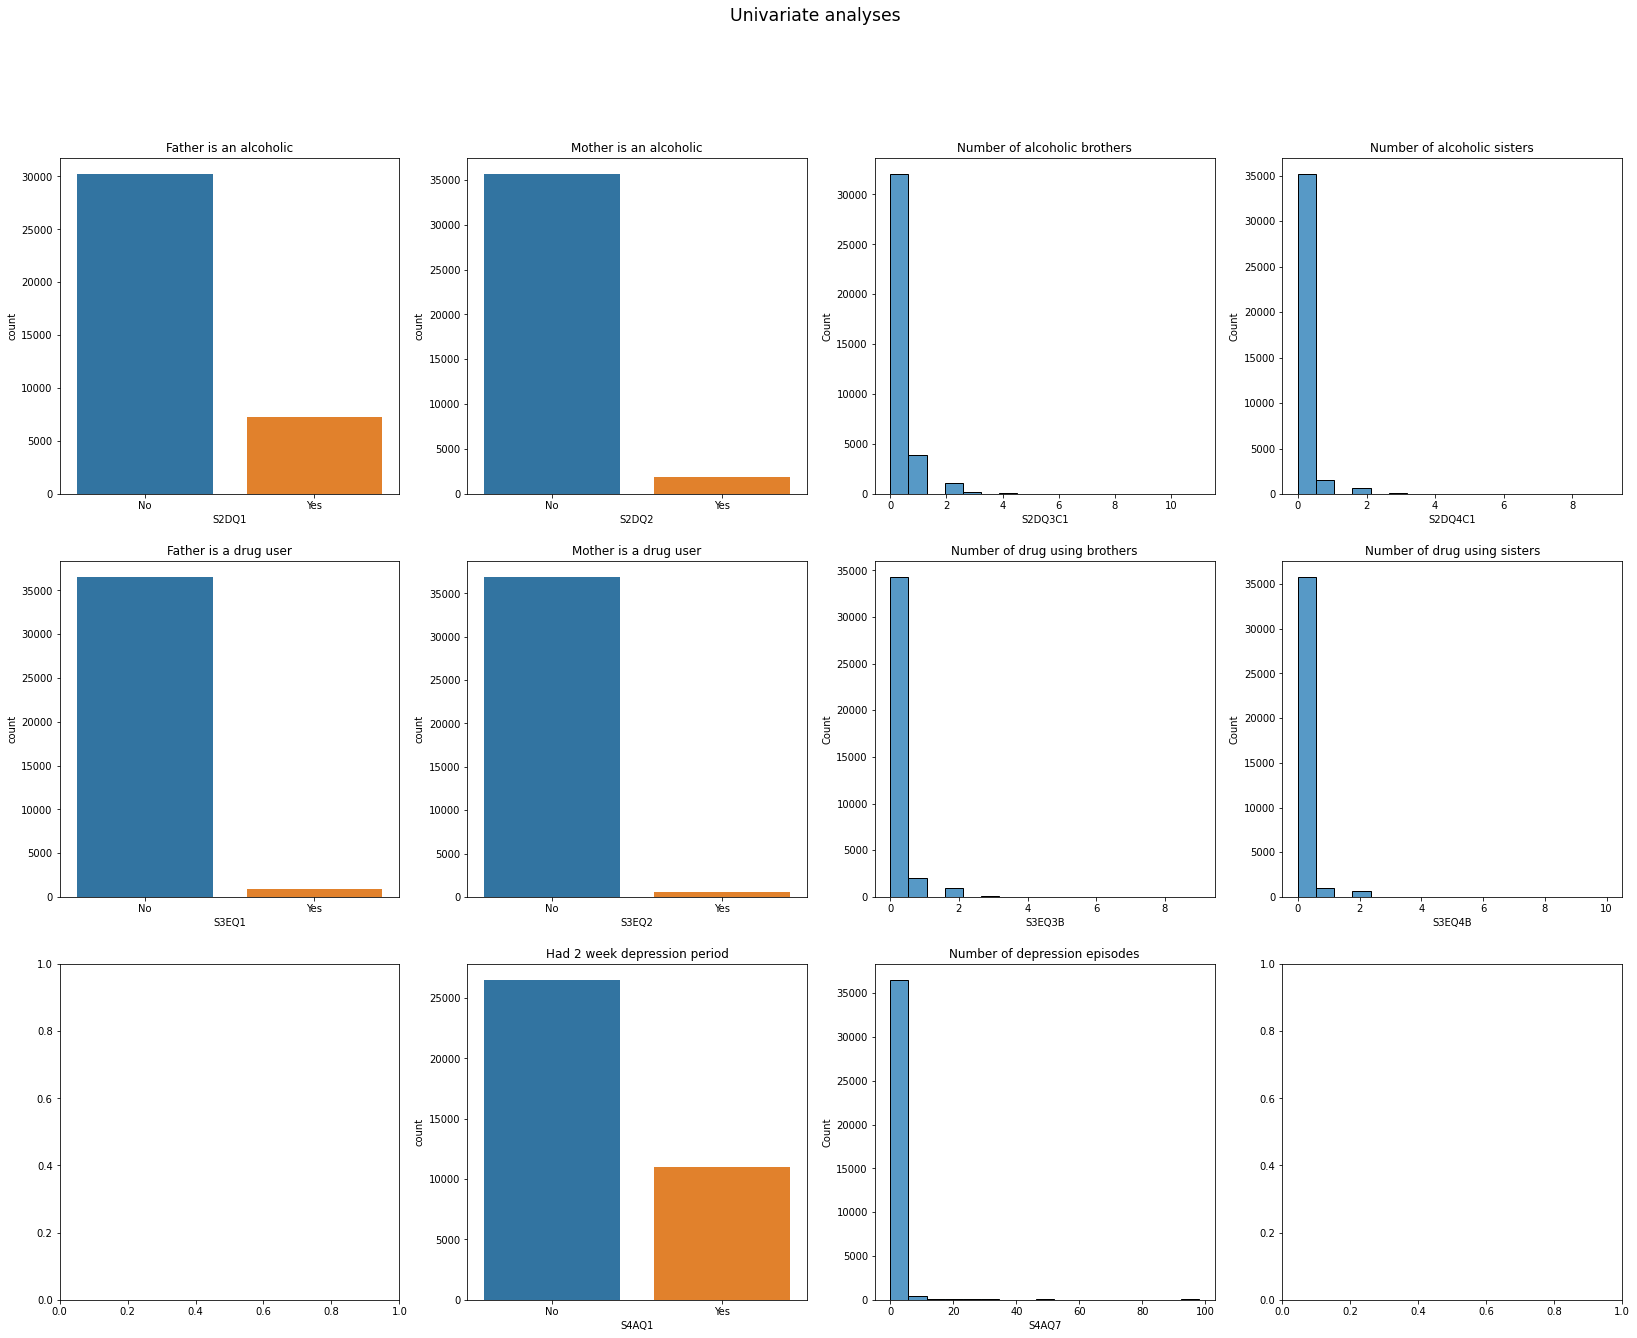

In [ ]:
#univariate bar graph for categorical variables
# First change format from numeric to categorical

data2 = data.copy()
fig, axes = plt.subplots(3, 4, figsize = (28, 21))
fig.suptitle('Univariate analyses', size='xx-large')

data2['S2DQ1'] = data2['S2DQ1'].astype('category')
data2['S2DQ1']=data2['S2DQ1'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[0,0], x='S2DQ1', data=data2)
axes[0,0].set_title('Father is an alcoholic')

data2['S2DQ2'] = data2['S2DQ2'].astype('category')
data2['S2DQ2']=data2['S2DQ2'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[0,1], x='S2DQ2', data=data2)
axes[0,1].set_title('Mother is an alcoholic')

seaborn.histplot(ax=axes[0,2], x='S2DQ3C1', data=data2, kde=False)
axes[0,2].set_title('Number of alcoholic brothers')

seaborn.histplot(ax=axes[0,3], x='S2DQ4C1', data=data2, kde=False)
axes[0,3].set_title('Number of alcoholic sisters')


data2['S3EQ1'] = data2['S3EQ1'].astype('category')
data2['S3EQ1']=data2['S3EQ1'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[1,0], x='S3EQ1', data=data2)
axes[1,0].set_title('Father is a drug user')

data2['S3EQ2'] = data2['S3EQ2'].astype('category')
data2['S3EQ2']=data2['S3EQ2'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[1,1], x='S3EQ2', data=data2)
axes[1,1].set_title('Mother is a drug user')

seaborn.histplot(ax=axes[1,2], x='S3EQ3B', data=data2, kde=False)
axes[1,2].set_title('Number of drug using brothers')

seaborn.histplot(ax=axes[1,3], x='S3EQ4B', data=data2, kde=False)
axes[1,3].set_title('Number of drug using sisters')

data2['S4AQ1'] = data2['S4AQ1'].astype('category')
data2['S4AQ1']=data2['S4AQ1'].cat.rename_categories(["No", "Yes"])
seaborn.countplot(ax=axes[2,1], x='S4AQ1', data=data2)
axes[2,1].set_title('Had 2 week depression period')

seaborn.histplot(ax=axes[2,2], x='S4AQ7', data=data2, kde=False)
axes[2,2].set_title('Number of depression episodes')

A lot of responses are geared towards not having signs of depression, alcohol, or drugs, but there are enough positive responses to conduct statistical analyses.

2. Conduct preliminary exploratory bivariate statistical analyses

Father is an alcoholic
chi-square value, p value, expected counts
(37460.59516601344, 0.0, 1, array([[24363.44967571,  5849.55032429],
       [ 5849.55032429,  1404.44967571]]))




Mother is an alcoholic
chi-square value, p value, expected counts
(1875.891085017149, 0.0, 1, array([[28715.53447033,  6894.46552967],
       [ 1497.46552967,   359.53447033]]))




Number of alcoholic brothers
                            OLS Regression Results                            
Dep. Variable:                S2DQ3C1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.07e-32
Time:                        12:27:21   Log-Likelihood:                -34514.
No. Observations:               37467   AIC:                         6.903e+04
Df Residuals:                   37465   BIC:          

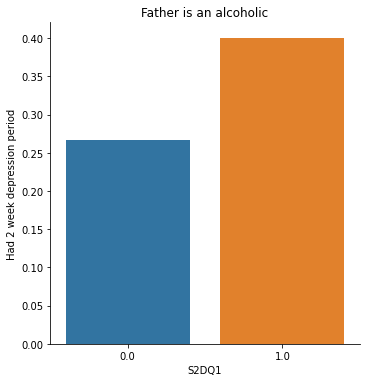

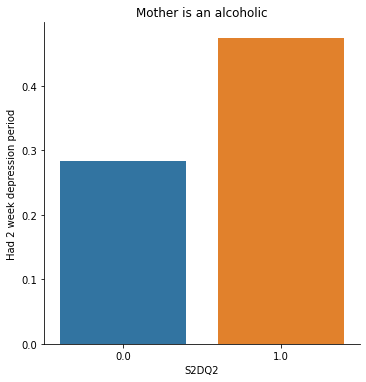

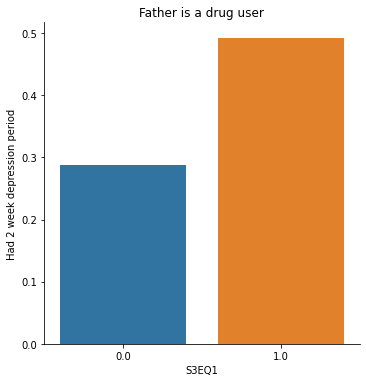

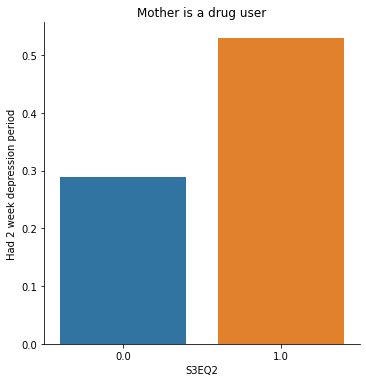

In [ ]:
dic = {
    'S2DQ1':'Father is an alcoholic',
    'S2DQ2':'Mother is an alcoholic',
    'S2DQ3C1':'Number of alcoholic brothers',
    'S2DQ4C1':'Number of alcoholic sisters',
    'S3EQ1':'Father is a drug user',
    'S3EQ2':'Mother is a drug user',
    'S3EQ3B':'Number of drug using brothers',
    'S3EQ4B':'Number of drug using sisters'
}

for col in dic.keys():
  if 'Number' not in dic[col]:
    #categorical, chi sq

    # contingency table of observed counts
    ct1=pandas.crosstab(data[col], data['S2DQ1'])

    # column percentages
    colsum=ct1.sum(axis=0)
    colpct=ct1/colsum

    # chi-square
    print(dic[col])
    print('chi-square value, p value, expected counts')
    cs1= scipy.stats.chi2_contingency(ct1)
    print(cs1)
    print('\n\n\n')

    # graph percent with nicotine dependence within each smoking frequency group 
    seaborn.catplot(x=col, y="S4AQ1", data=data, kind="bar", ci=None)
    plt.title(dic[col])
    plt.ylabel('Had 2 week depression period')

  else:
    #quantitative, anova

    print(dic[col])
    formula = col + ' ~ C(S4AQ1)'
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    print(results.summary())
    print('\n\n\n')

All the p-values are significantly smaller than the commonly used a=0.05 value, so we know that each of the explanatory variables have significant relationships with the response variable.

ANOVA should not be used but binary nature of response variable allows it to perform with useful results. 

3. Create a decision tree and a random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#tree
#Split into training and testing sets

predictors = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

targets = data.S4AQ1

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data; can put (class_weight="balanced") in decisiontreeclassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#confusion matrix
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
#accuracy
print(sklearn.metrics.accuracy_score(tar_test, predictions))

#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
from IPython.display import Image  
Image(graph.create_png())


[[10378   207]
 [ 4199   203]]
0.706011876960032


[[10272   295]
 [ 4128   292]]
0.7048775605524789
[0.18197636 0.10837062 0.18233265 0.12566125 0.07415642 0.05326745
 0.1727333  0.10150195]


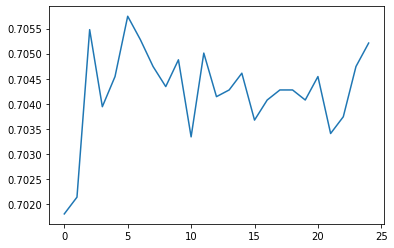

In [ ]:
# random forest
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


#Split into training and testing sets

predictors = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

targets = data.S4AQ1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#confusion matrix
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
#accuracy
print(sklearn.metrics.accuracy_score(tar_test, predictions))


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=numpy.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)


Accuracy is at 70.48%; 10272 true positives, 295 false positives, 4128 false negatives, 292 true negatives.
Highest important score is S2DQ3C1 at 0.182, followed by S2DQ1. Lowest is S3EQ2 at 0.053, followed by S3EQ1.
Graph shows that accuracy of model does not vary greatly after about 2 trees in the random forest model.

4. do lasso

{'S2DQ1': 0.03753325363139382, 'S2DQ2': 0.026055655715678146, 'S2DQ3C1': 0.008507671304635735, 'S2DQ4C1': 0.01284049711861352, 'S3EQ1': 0.015034385849593728, 'S3EQ2': 0.010898576847381653, 'S3EQ3B': 0.013546943901481664, 'S3EQ4B': 0.0073336075548796915}
training data MSE
0.20198155260665931
test data MSE
0.20222203371028563
training data R-square
0.023970647513062104
test data R-square
0.02558951075309679


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


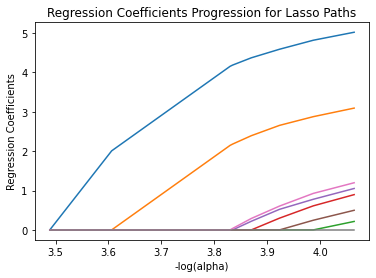

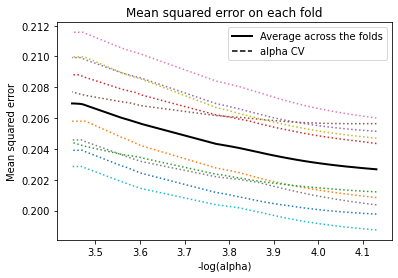

In [ ]:
from sklearn.linear_model import LassoLarsCV
#Split into training and testing sets

predictor = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

target = data.S4AQ1

# standardize predictors to have mean=0 and sd=1
predictors=predictor.copy()
from sklearn import preprocessing

for col in predictors:
  predictors[col]=preprocessing.scale(predictors[col].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
print(dict(zip(predictors.columns, model.coef_)))

# plot coefficient progression
m_log_alphas = -numpy.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -numpy.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)




coefficients with zero value meant that they were deemed irrelevant and thus removed. S2DQ1 had the greatest coefficient and thus entered the graph first at the blue line. 

all variables have a positive relation with the response variable.

but the entire model has an r squared value of less than 1%. oh no.


1. do graphing and 04-06 to filter any weak correlation vars
2. decision tree -> random forest -> lasso
3. logistic / multi reg to get a formula

In [ ]:
# logistic regression with both explanatory
lreg = smf.logit(formula = 'S4AQ1 ~ C(S2DQ1)+C(S2DQ2)+S2DQ3C1+S2DQ4C1+C(S3EQ1)+C(S3EQ2)+S3EQ3B+S3EQ4B', data = data).fit()
print (lreg.summary())

# odds ratios
print ("Odds Ratios")
print (numpy.exp(lreg.params))

# odd ratios with 95% confidence intervals
params = lreg.params
conf = lreg.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))



Optimization terminated successfully.
         Current function value: 0.593261
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  S4AQ1   No. Observations:                37467
Model:                          Logit   Df Residuals:                    37458
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                 0.01900
Time:                        12:28:08   Log-Likelihood:                -22228.
converged:                       True   LL-Null:                       -22658.
Covariance Type:            nonrobust   LLR p-value:                1.526e-180
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0747      0.014    -78.509      0.000      -1.102      -1.048
C(S2DQ1)[T.1.0

P values are significant for the model, S2DQ1, S2DQ2, S3EQ3B and too big for every other variable. 

According to odds ratios, those with alcoholic fathers are 1.29 to 2.24 times more likely to have depression periods than those without.

Since the intervals do not overlap, having drug using fathers is less strongly associated with the response variable than having alcoholic fathers. But we need not look at the odds ratios for those with insignificant p values.

Also note that we have an r squared of 2%. will rewriting our logistic regression model solve this?

In [ ]:
# logistic regression with both explanatory
lreg = smf.logit(formula = 'S4AQ1 ~ C(S2DQ1)+C(S2DQ2)+S3EQ3B', data = data).fit()
print (lreg.summary())

# odds ratios
print ("Odds Ratios")
print (numpy.exp(lreg.params))

# odd ratios with 95% confidence intervals
params = lreg.params
conf = lreg.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))

Optimization terminated successfully.
         Current function value: 0.595249
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  S4AQ1   No. Observations:                37467
Model:                          Logit   Df Residuals:                    37463
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                 0.01571
Time:                        12:28:13   Log-Likelihood:                -22302.
converged:                       True   LL-Null:                       -22658.
Covariance Type:            nonrobust   LLR p-value:                5.473e-154
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0497      0.013    -78.404      0.000      -1.076      -1.023
C(S2DQ1)[T.1.0

R squared decreased. what. all p values are significant.

let's try with the quantitative response variable.

1. bivariate

Father is an alcoholic
                            OLS Regression Results                            
Dep. Variable:                  S4AQ7   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     135.8
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.49e-31
Time:                        12:28:17   Log-Likelihood:            -1.1842e+05
No. Observations:               37467   AIC:                         2.369e+05
Df Residuals:                   37465   BIC:                         2.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          

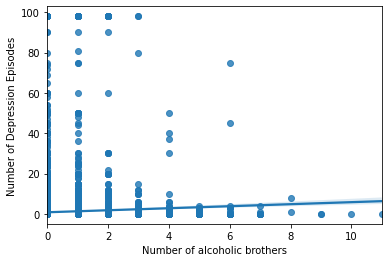

association between Number of alcoholic brothers and depression episodes, r and p
(0.053401028123326956, 4.476460340502627e-25)


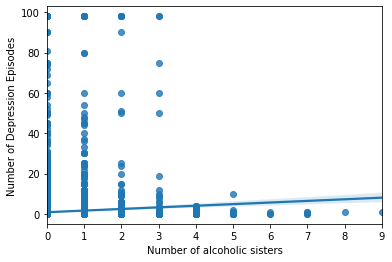

association between Number of alcoholic sisters and depression episodes, r and p
(0.053931230141800054, 1.5219980300400041e-25)
Father is a drug user
                            OLS Regression Results                            
Dep. Variable:                  S4AQ7   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           1.16e-26
Time:                        12:30:01   Log-Likelihood:            -1.1843e+05
No. Observations:               37467   AIC:                         2.369e+05
Df Residuals:                   37465   BIC:                         2.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t| 

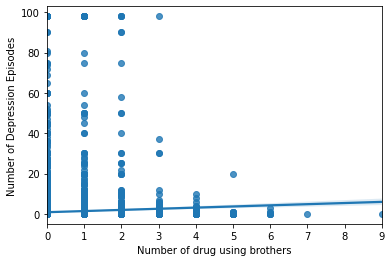

association between Number of drug using brothers and depression episodes, r and p
(0.0457831645125418, 7.5600826403319e-19)


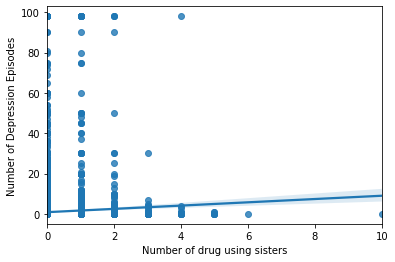

association between Number of drug using sisters and depression episodes, r and p
(0.047279362024533284, 5.366012904074447e-20)


In [ ]:
dic = {
    'S2DQ1':'Father is an alcoholic',
    'S2DQ2':'Mother is an alcoholic',
    'S2DQ3C1':'Number of alcoholic brothers',
    'S2DQ4C1':'Number of alcoholic sisters',
    'S3EQ1':'Father is a drug user',
    'S3EQ2':'Mother is a drug user',
    'S3EQ3B':'Number of drug using brothers',
    'S3EQ4B':'Number of drug using sisters'
}

for col in dic.keys():
  if 'Number' in dic[col]: #corr
    scat1 = seaborn.regplot(x=col, y="S4AQ7", fit_reg=True, data=data)
    plt.xlabel(dic[col])
    plt.ylabel('Number of Depression Episodes')
    plt.show()

    print ('association between '+dic[col]+ ' and depression episodes, r and p')
    print (scipy.stats.pearsonr(data[col], data['S4AQ7']))

  else:
    #anova

    print(dic[col])
    formula = 'S4AQ7 ~ C('+col+')'
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    print(results.summary())
    print('\n\n\n')

[[11890    48    20 ...     0     0     1]
 [ 1514    11     6 ...     0     0     0]
 [  479     4     6 ...     0     0     0]
 ...
 [    2     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [   34     3     1 ...     0     0     0]]
0.7944885567491826
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.424438 to fit



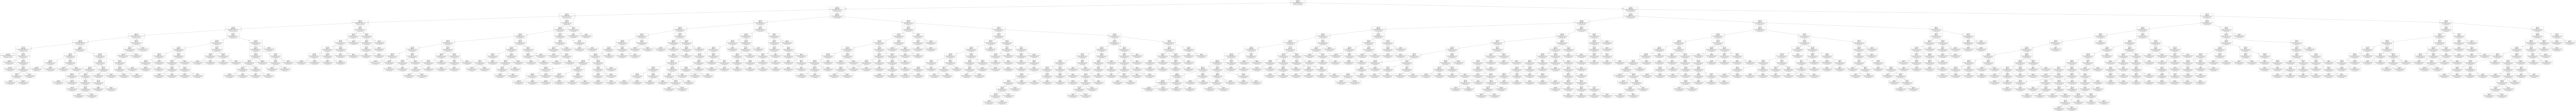

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

#tree
#Split into training and testing sets

predictors = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

targets = data.S4AQ7

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data; can put (class_weight="balanced") in decisiontreeclassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#confusion matrix
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
#accuracy
print(sklearn.metrics.accuracy_score(tar_test, predictions))

#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
from IPython.display import Image  
Image(graph.create_png())


[[11875    36    17 ...     0     0     5]
 [ 1518    10     6 ...     0     0     1]
 [  480     3     2 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    2     0     0 ...     0     0     0]
 [   30     0     0 ...     0     0     0]]
0.7931540668579435
[0.11844438 0.06508128 0.20710878 0.15025303 0.05289205 0.04339778
 0.20741225 0.15541045]


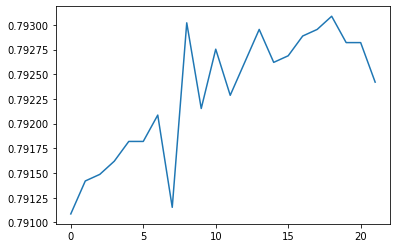

In [ ]:
# random forest
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


#Split into training and testing sets

predictors = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

targets = data.S4AQ7

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=22)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#confusion matrix
print(sklearn.metrics.confusion_matrix(tar_test,predictions))
#accuracy
print(sklearn.metrics.accuracy_score(tar_test, predictions))


# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)


"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(22)
accuracy=numpy.zeros(22)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)


{'S2DQ1': 0.15269559763852597, 'S2DQ2': 0.2322941429678815, 'S2DQ3C1': 0.17796836154408863, 'S2DQ4C1': 0.12654582805267486, 'S3EQ1': 0.12691991862974478, 'S3EQ2': 0.18503370096100663, 'S3EQ3B': 0.0748828354119861, 'S3EQ4B': 0.15186705584877055}
training data MSE
32.06764521777013
test data MSE
32.75733267391393
training data R-square
0.011721247650031463
test data R-square
0.015574358077927841


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


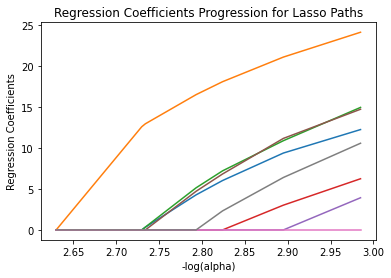

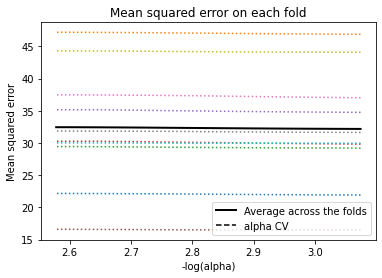

In [ ]:
from sklearn.linear_model import LassoLarsCV
#Split into training and testing sets

predictor = data[['S2DQ1','S2DQ2','S2DQ3C1','S2DQ4C1','S3EQ1','S3EQ2','S3EQ3B','S3EQ4B']]

target = data.S4AQ7

# standardize predictors to have mean=0 and sd=1
predictors=predictor.copy()
from sklearn import preprocessing

for col in predictors:
  predictors[col]=preprocessing.scale(predictors[col].astype('float64'))

# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

# print variable names and regression coefficients
print(dict(zip(predictors.columns, model.coef_)))

# plot coefficient progression
m_log_alphas = -numpy.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

# plot mean square error for each fold
m_log_alphascv = -numpy.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
         

# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)




                            OLS Regression Results                            
Dep. Variable:                  S4AQ7   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     62.02
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          2.28e-101
Time:                        12:33:52   Log-Likelihood:            -1.1825e+05
No. Observations:               37467   AIC:                         2.365e+05
Df Residuals:                   37458   BIC:                         2.366e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5913      0.034     

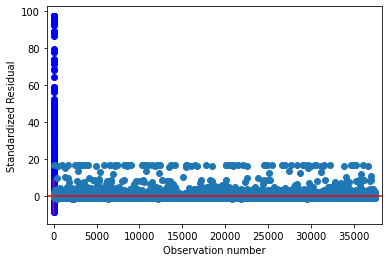

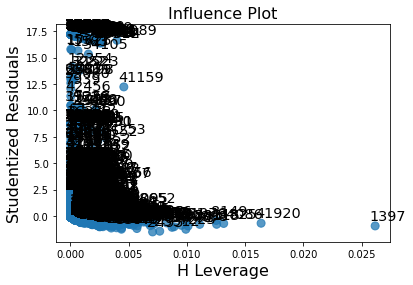

In [ ]:
# multiple regression with depression and centered number of cigarettes smoked
reg = smf.ols('S4AQ7 ~ C(S2DQ1)+C(S2DQ2)+S2DQ3C1+S2DQ4C1+C(S3EQ1)+C(S3EQ2)+S3EQ3B+S3EQ4B', data=data).fit()
print (reg.summary())

#qq plot for normality
reg2 = sm.qqplot(reg.resid, line='r')

#simple plot of residuals
stdres = pandas.DataFrame(reg.resid_pearson)
fig=plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation number')
print(fig)

#leverage plot
fig3 = sm.graphics.influence_plot(reg, size=8)
print(fig3)

Summary

Limitations and recommendations